In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from scipy.stats import linregress

##### Import sea level data (.csv)

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df.head(10)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
5,1885,0.531496,-0.330709,1.393701,NaN
6,1886,0.437008,-0.381890,1.255906,NaN
7,1887,0.216535,-0.602362,1.035433,NaN
8,1888,0.299213,-0.519685,1.118110,NaN
9,1889,0.362205,-0.456693,1.181102,NaN


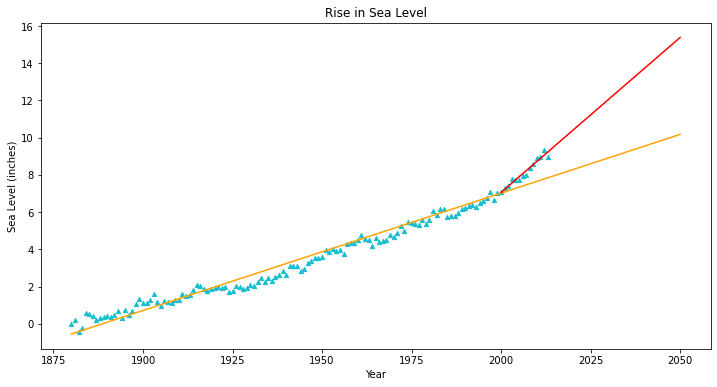

In [7]:
# constructing the figure
fig = mpl.figure(figsize = (12, 6) )
mpl.title('Rise in Sea Level')
mpl.xlabel('Year')
mpl.ylabel('Sea Level (inches)')

# all data and stats
xdat, ydat = df['Year'], df['CSIRO Adjusted Sea Level']
mpl.scatter(xdat, ydat, color = "tab:cyan", marker = '^', s = 18)
grad, intercept = linregress(xdat,ydat)[0], linregress(xdat,ydat)[1]

# line of best fit for all data
x = np.arange(1880, 2051)
mpl.plot(x, grad*x + intercept, color = "orange")

# recent data and stats
mask = df['Year'] >= 2000
xdat_rec, ydat_rec = df[mask]['Year'], df[mask]['CSIRO Adjusted Sea Level']
grad_rec, intercept_rec = linregress(xdat_rec,ydat_rec)[0], linregress(xdat_rec,ydat_rec)[1]

# line of best fit for recent data
x_rec = np.arange(2000, 2051)
mpl.plot(x_rec, grad_rec*x_rec + intercept_rec, color = "red")